In [0]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [43]:
df = pd.read_csv('deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [44]:
df.isna().sum()


deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [45]:
df.columns

Index(['deceptive', 'hotel', 'polarity', 'source', 'text'], dtype='object')

In [46]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

truthful mean: 821.015
deceptive mean: 791.4325


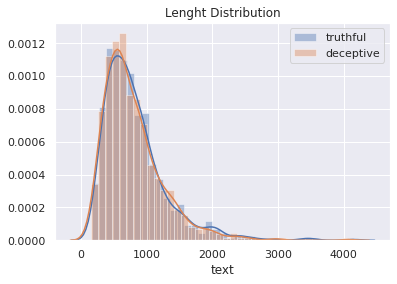

In [47]:
s1 = df[df.deceptive  == 'truthful'].text.apply(len)
s2 = df[df.deceptive == 'deceptive'].text.apply(len)
sns.distplot(s1,label='truthful')
sns.distplot(s2,label='deceptive')

sns.set()

plt.title('Lenght Distribution')
plt.legend()

print('truthful mean: %s' % s1.mean())
print(f'deceptive mean: {s2.mean()}')

positive mean: 656.5275
negative mean: 955.92


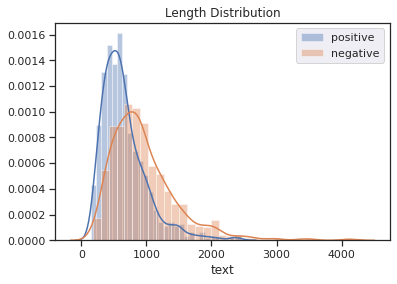

In [81]:
s1 = df[df.polarity  == 'positive'].text.apply(len)
s2 = df[df.polarity == 'negative'].text.apply(len)
sns.distplot(s1,label='positive')
sns.distplot(s2,label='negative')

sns.set()

plt.title('Length Distribution')
plt.legend()

print('positive mean: %s' % s1.mean())
print(f'negative mean: {s2.mean()}')

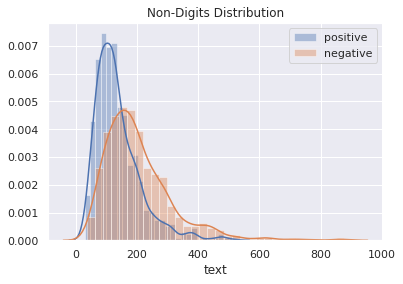

In [49]:
s1 = df[df.polarity == 'positive']['text'].str.replace(r'\w+', '').str.len()
s2 = df[df.polarity == 'negative']['text'].str.replace(r'\w+', '').str.len()

sns.distplot(s1, label='positive')
sns.distplot(s2, label='negative')

plt.title('Non-Digits Distribution')
plt.legend()

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df.polarity

y = le.fit_transform(y)
X = df.drop(columns='polarity')
y

array([1, 1, 1, ..., 0, 0, 0])

In [0]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def roc_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        try:
            temp_acc = roc_auc_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
            res[c] = temp_acc
        except ValueError:
            pass
        
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

def print_roc_auc(y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = roc_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [54]:
# Сформируем общий словарь для обучения моделей из обучающей и тестовой выборки
vocab_list = df['text'].tolist()
vocab_list[1:15]

['Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n',
 "This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Park

In [57]:
vocabVect = CountVectorizer()
vocabVect.fit(vocab_list)
corpusVocab = vocabVect.vocabulary_
print('Количество сформированных признаков - {}'.format(len(corpusVocab)))

Количество сформированных признаков - 9570


In [59]:
for i in list(corpusVocab)[1:10]:
    print('{}={}'.format(i, corpusVocab[i]))

stayed=8064
for=3556
one=5865
night=5677
getaway=3769
with=9443
family=3323
on=5863
thursday=8599


###Векторизация текста

Для векторизации можно использовать простой класс CountVectorizer. Подсчитывает количество слов словаря, входящих в данный текст

In [0]:
test_features = vocabVect.transform(vocab_list)

In [61]:
test_features

<1600x9570 sparse matrix of type '<class 'numpy.int64'>'
	with 146467 stored elements in Compressed Sparse Row format>

In [62]:
test_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [63]:
# Размер нулевой строки
len(test_features.todense()[0].getA1())

9570

In [0]:
# Непустые значения нулевой строки
[i for i in test_features.todense()[0].getA1() if i>0]

In [68]:
vocabVect.get_feature_names()[500:530]

['agree',
 'agreeable',
 'agreed',
 'agreement',
 'ah',
 'ahead',
 'ahould',
 'aid',
 'aides',
 'air',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airshow',
 'airy',
 'aka',
 'akin',
 'akk',
 'al',
 'alarm',
 'alarmed',
 'alas',
 'albeit',
 'albiet',
 'alcoholic',
 'alcove',
 'alert']

Использование N-грамм

In [70]:
ncv = CountVectorizer(ngram_range=(1,3))
ngram_features = ncv.fit_transform(vocab_list)
ngram_features

<1600x257331 sparse matrix of type '<class 'numpy.int64'>'
	with 579998 stored elements in Compressed Sparse Row format>

In [71]:
len(ncv.get_feature_names())

257331

In [73]:
# Теперь признаками являются N-граммы
ncv.get_feature_names()[2000:2020]

['500 certificate me',
 '500 dollars',
 '500 dollars for',
 '500 night',
 '500 night one',
 '500 paint',
 '500 paint scrape',
 '500 to',
 '500 to fix',
 '50pm',
 '50pm the',
 '50pm the bar',
 '51',
 '51 00',
 '51 00 night',
 '51 night',
 '51 night but',
 '51 night lobby',
 '52',
 '52 plasma']

In [74]:
tfidfv = TfidfVectorizer(ngram_range=(1,3))
tfidf_ngram_features = tfidfv.fit_transform(vocab_list)
tfidf_ngram_features

<1600x257331 sparse matrix of type '<class 'numpy.float64'>'
	with 579998 stored elements in Compressed Sparse Row format>

In [75]:
tfidf_ngram_features.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.03880781, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [0]:
# Непустые значения нулевой строки
[i for i in tfidf_ngram_features.todense()[0].getA1() if i>0]

Решение задачи анализа тональности

*С использованием кросс-валидации попробуем применить к корпусу текстов различные варианты векторизации и классификации.*

In [0]:
def VectorizeAndClassify(vectorizers_list, classifiers_list):
    for v in vectorizers_list:
        for c in classifiers_list:
            pipeline1 = Pipeline([("vectorizer", v), ("classifier", c)])
            score = cross_val_score(pipeline1, df['text'], y, scoring='accuracy', cv=3).mean()
            print('Векторизация - {}'.format(v))
            print('Модель для классификации - {}'.format(c))
            print('Accuracy = {}'.format(score))
            print('===========================')

In [105]:
vectorizers_list = [CountVectorizer(vocabulary = corpusVocab), TfidfVectorizer(vocabulary = corpusVocab)]
classifiers_list = [LogisticRegression(C=3.0), LinearSVC(), KNeighborsClassifier()]
VectorizeAndClassify(vectorizers_list, classifiers_list)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Векторизация - CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary={'00': 0, '000': 1, '00a': 2, '00am': 3, '00pm': 4,
                            '03': 5, '04': 6, '05': 7, '06': 8, '07': 9,
                            '08': 10, '0800': 11, '09': 12, '10': 13, '100': 14,
                            '103': 15, '104': 16, '105': 17, '105mph': 18,
                            '107': 19, '10am': 20, '10pm': 21, '10th': 22,
                            '10x': 23, '10yo': 24, '11': 25, '110': 26,
                            '1112': 27, '116': 28, '11am': 29, ...})
Модель для классификации - LogisticRegression(C=3.0, class_weig

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Векторизация - CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary={'00': 0, '000': 1, '00a': 2, '00am': 3, '00pm': 4,
                            '03': 5, '04': 6, '05': 7, '06': 8, '07': 9,
                            '08': 10, '0800': 11, '09': 12, '10': 13, '100': 14,
                            '103': 15, '104': 16, '105': 17, '105mph': 18,
                            '107': 19, '10am': 20, '10pm': 21, '10th': 22,
                            '10x': 23, '10yo': 24, '11': 25, '110': 26,
                            '1112': 27, '116': 28, '11am': 29, ...})
Модель для классификации - LinearSVC(C=1.0, class_weight=None, 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.3, random_state=1)

In [0]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)
    print_roc_auc(y_test, y_pred)

In [126]:
sentiment(TfidfVectorizer(), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.9669421487603306
1 	 0.9243697478991597


In [93]:
sentiment(TfidfVectorizer(ngram_range=(1,3)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.9669421487603306
1 	 0.9201680672268907


In [94]:
sentiment(TfidfVectorizer(ngram_range=(2,3)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.9214876033057852
1 	 0.9159663865546218


In [95]:
sentiment(TfidfVectorizer(ngram_range=(1,4)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.9628099173553719
1 	 0.8991596638655462


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

tfvectorizer = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2',ngram_range=(1, 2),stop_words='english')
text_clf = Pipeline([('tfidf', tfvectorizer),
('MnNB', MultinomialNB()),
])

text_clf2 = Pipeline([('tfidf', tfvectorizer),
                     ('lSVC', CalibratedClassifierCV(LinearSVC())),
])

text_clf3 = Pipeline([('tfidf', tfvectorizer),
                     ('LR', LogisticRegression()),
])



MultinomialNB

In [148]:
%time text_clf.fit(X_train, y_train);

CPU times: user 324 ms, sys: 8.81 ms, total: 333 ms
Wall time: 334 ms


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('MnNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

accuracy train: 0.9973214285714286
accuracy test : 0.9520833333333333 

precision train: 0.9946902654867257
precision test : 0.9282868525896414 

recall train: 1.0
recall test : 0.9789915966386554 



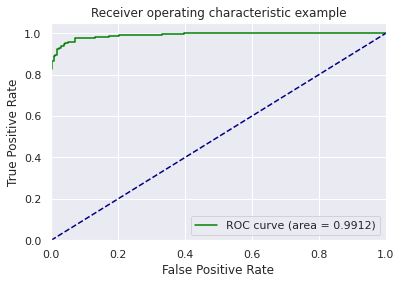

In [149]:
from sklearn.metrics import accuracy_score as accuracy, precision_score as precision, recall_score as recall

print('accuracy train:', accuracy(y_train, text_clf.predict(X_train)))
print('accuracy test :', accuracy(y_test, text_clf.predict(X_test)), '\n')

print('precision train:', precision(y_train, text_clf.predict(X_train)))
print('precision test :', precision(y_test, text_clf.predict(X_test)), '\n')

print('recall train:', recall(y_train, text_clf.predict(X_train)))
print('recall test :', recall(y_test, text_clf.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

LinearSVC

In [151]:
%time text_clf2.fit(X_train, y_train);

CPU times: user 410 ms, sys: 6.61 ms, total: 417 ms
Wall time: 421 ms


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lSVC',
                 CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0,
                                                                 class

accuracy train: 1.0
accuracy test : 0.94375 

precision train: 1.0
precision test : 0.934156378600823 

recall train: 1.0
recall test : 0.9537815126050421 



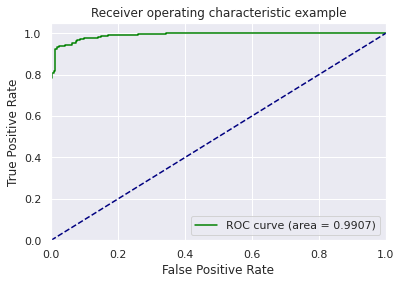

In [152]:
print('accuracy train:', accuracy(y_train, text_clf2.predict(X_train)))
print('accuracy test :', accuracy(y_test, text_clf2.predict(X_test)), '\n')

print('precision train:', precision(y_train, text_clf2.predict(X_train)))
print('precision test :', precision(y_test, text_clf2.predict(X_test)), '\n')

print('recall train:', recall(y_train, text_clf2.predict(X_train)))
print('recall test :', recall(y_test, text_clf2.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Линейная регрессия

In [153]:
%time text_clf3.fit(X_train, y_train)

CPU times: user 536 ms, sys: 164 ms, total: 701 ms
Wall time: 546 ms


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scal

accuracy train: 0.9973214285714286
accuracy test : 0.94375 

precision train: 0.9946902654867257
precision test : 0.934156378600823 

recall train: 1.0
recall test : 0.9537815126050421 



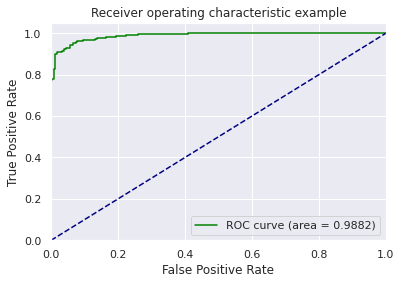

In [155]:
print('accuracy train:', accuracy(y_train, text_clf3.predict(X_train)))
print('accuracy test :', accuracy(y_test, text_clf3.predict(X_test)), '\n')
print('precision train:', precision(y_train, text_clf3.predict(X_train)))
print('precision test :', precision(y_test, text_clf3.predict(X_test)), '\n')
print('recall train:', recall(y_train, text_clf3.predict(X_train)))
print('recall test :', recall(y_test, text_clf3.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Сравним характеристики трёх моделей. На рассмотренном наборе данных наибольшую эффективность демонстрирует модель LinearSVC